## Structural distinction using pyiron and pyscal

In this tutorial, we will read in MD snapshots using pyiron. We will then use the pyscal module to indentify the structure in which the MD configuration is in.

Import necessary modules

In [1]:
import os
import pyiron
from ase.io import read
import pyscal.core as pc
import matplotlib.pyplot as plt

Create a pyiron project

In [2]:
pr = pyiron.Project('ADIS')

Check the job table 

In [3]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,2,finished,H8192,Nucleus,/Nucleus,/home/jovyan/,ADIS/,2020-11-05 21:11:34.985406,None,None,pyiron@jupyter-pyiron-2dadis-2dworkshop-2d2020-2d3piumz95#1,AtomisticGenericJob,0.2.0,None,None
1,4,finished,H3980,Si_1400_20,/Si_1400_20,/home/jovyan/,ADIS/,2020-11-05 21:11:40.585864,None,None,pyiron@jupyter-pyiron-2dadis-2dworkshop-2d2020-2d3piumz95#1,AtomisticGenericJob,0.2.0,None,None
2,5,finished,H1529,S5_s00_n130_r1024_720_5,/S5_s00_n130_r1024_720_5,/home/jovyan/,ADIS/,2020-11-05 21:11:43.147042,None,None,pyiron@jupyter-pyiron-2dadis-2dworkshop-2d2020-2d3piumz95#1,AtomisticGenericJob,0.2.0,None,None
3,6,finished,H1980,Fe_1050_20,/Fe_1050_20,/home/jovyan/,ADIS/,2020-11-05 21:11:47.255863,None,None,pyiron@jupyter-pyiron-2dadis-2dworkshop-2d2020-2d3piumz95#1,AtomisticGenericJob,0.2.0,None,None
4,7,finished,H1980,Fe_1350_20,/Fe_1350_20,/home/jovyan/,ADIS/,2020-11-05 21:11:53.247038,None,None,pyiron@jupyter-pyiron-2dadis-2dworkshop-2d2020-2d3piumz95#1,AtomisticGenericJob,0.2.0,None,None
5,8,finished,H3995,Si_1000_5,/Si_1000_5,/home/jovyan/,ADIS/,2020-11-05 21:11:59.993315,None,None,pyiron@jupyter-pyiron-2dadis-2dworkshop-2d2020-2d3piumz95#1,AtomisticGenericJob,0.2.0,None,None
6,9,finished,H1980,Cu_720_20,/Cu_720_20,/home/jovyan/,ADIS/,2020-11-05 21:12:06.132659,None,None,pyiron@jupyter-pyiron-2dadis-2dworkshop-2d2020-2d3piumz95#1,AtomisticGenericJob,0.2.0,None,None
7,10,finished,H2000,Cu_400_0,/Cu_400_0,/home/jovyan/,ADIS/,2020-11-05 21:12:11.172906,None,None,pyiron@jupyter-pyiron-2dadis-2dworkshop-2d2020-2d3piumz95#1,AtomisticGenericJob,0.2.0,None,None
8,11,finished,H4000,Mg_900_0,/Mg_900_0,/home/jovyan/,ADIS/,2020-11-05 21:12:18.633493,None,None,pyiron@jupyter-pyiron-2dadis-2dworkshop-2d2020-2d3piumz95#1,AtomisticGenericJob,0.2.0,None,None
9,12,finished,H4000,Mg_500_0,/Mg_500_0,/home/jovyan/,ADIS/,2020-11-05 21:12:24.458570,None,None,pyiron@jupyter-pyiron-2dadis-2dworkshop-2d2020-2d3piumz95#1,AtomisticGenericJob,0.2.0,None,None


We can try an FCC structure, Copper at 400 K

In [4]:
job = pr.load("Cu_400_0")

Get the structure from the job

In [5]:
Cu400 = job.get_structure()

---

## Common Neighbor Analysis

This is a simple FCC structure, so we can an adaptive common neighbor analysis method to find the structure. CNA uses three indices for each pair of atoms, let's say $i$ and $j$:

- The number of common neighbors shared by atoms $i$ and $j$
- The number of bonds among these common neighbors
- The longest chain of bonds connecting these neighbors

<img src="images/cna.png" alt="drawing" width="500"/>

Image source: arXiv:2003.08879

For the analysis, we will use pyscal as it is implemented within pyiron

<table border="0">
 <tr>
    <td><b style="font-size:20px">pyscal</b></td>
    <td><b style="font-size:20px"></b></td>
 </tr>
 <tr>
    <td> <p style="color:gray;font-size:18px;text-align:justify"> pyscal is a python module for the calculation of local atomic structural environments including Steinhardt's bond orientational order parameters during post-processing of atomistic simulation data. The core functionality of pyscal is written in C++ with python wrappers using pybind11 which allows for fast calculations with possibilities for easy expansion in python. <br> <br>
        webpage : pyscal.org <br>
        github : github.com/srmnitc/pyscal
        </p> </td>
    <td><img src="images/pyscal_logo1.png" width="80%" align="right"></td>
 </tr>
</table>

In [6]:
from pyiron.atomistics.structure.pyscal import analyse_cna_adaptive

In [7]:
analyse_cna_adaptive(Cu400)

[17, 1983, 0, 0, 0]

The numbers are in the order : Others, fcc, hcp, bcc, icosahedral. From the numbers, it is clear that the system is completely fcc structured.

Let's try for a different structure. Cu at 720 K.

In [8]:
job = pr.load("Cu_720_0")
Cu720 = job.get_structure()

In [9]:
analyse_cna_adaptive(Cu720)

[133, 1867, 0, 0, 0]

When we follow the same procedure, theres only 1835 atoms. 165 atoms are now identified as Others. Structural identification becomes increasingly difficult at higher temperatures.

---

## Steinhardt's parameters

[Steinhardt\'s bond orientational order parameters](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.28.784) are a set of
parameters based on [spherical
harmonics](https://en.wikipedia.org/wiki/Spherical_harmonics) to explore
the local atomic environment. These parameters have been used
extensively for various uses such as distinction of crystal structures,
identification of solid and liquid atoms and identification of
defects.

These parameters, which are rotationally and translationally invariant
are defined by,

> $$ q_l (i) =  \Big(  \frac{4\pi}{2l+1}  \sum_{m=-l}^l | q_{lm}(i) |^2 \Big )^{\frac{1}{2}} $$

where,

> $$ q_{lm} (i) =  \frac{1}{N(i)} \sum_{j=1}^{N(i)} Y_{lm}(\pmb{r}_{ij}) $$

in which $Y_{lm}$ are the spherical harmonics and $N(i)$ is the number
of neighbours of particle $i$, $\pmb{r}_{ij}$ is the vector connecting
particles $i$ and $j$, and $l$ and $m$ are both intergers with
$m \in [-l,+l]$. Various parameters have found specific uses, such as
$q_2$ and $q_6$ for identification of crystallinity, $q_6$ for
identification of solidity, and $q_4$ and $q_6$ for [distinction of
crystal structures](https://aip.scitation.org/doi/full/10.1063/1.4774084).

First a function to calculate Steinhardt's parameters

In [10]:
from pyiron.atomistics.structure.pyscal import get_steinhardt_parameter_job

We will take the basic lattices - bcc, fcc and hcp and see how the Steinhardt's parameters look

In [11]:
bccq, _ = get_steinhardt_parameter_job(pr.load("Fe_750_0"), cutoff=3.3, clustering=False)
fccq, _ = get_steinhardt_parameter_job(pr.load("Cu_400_0"), clustering=False)
hcpq, _ = get_steinhardt_parameter_job(pr.load("Mg_500_0"), clustering=False)

Lets plot the values

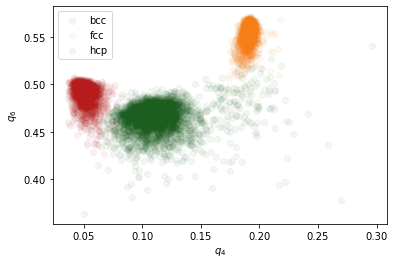

In [12]:
plt.scatter(bccq[0], bccq[1], alpha=0.05, label="bcc", color="#B71C1C")
plt.scatter(fccq[0], fccq[1], alpha=0.05, label="fcc", color="#F57F17")
plt.scatter(hcpq[0], hcpq[1], alpha=0.05, label="hcp", color="#1B5E20")
plt.xlabel(r"$q_4$")
plt.ylabel(r"$q_6$")
plt.legend()

The distributions look well separated. Lets try at a higher temperature.

In [13]:
bccq, _ = get_steinhardt_parameter_job(pr.load("Fe_1350_0"), cutoff=3.3, clustering=False)
fccq, _ = get_steinhardt_parameter_job(pr.load("Cu_720_0"), clustering=False)
hcpq, _ = get_steinhardt_parameter_job(pr.load("Mg_1000_0"), clustering=False)

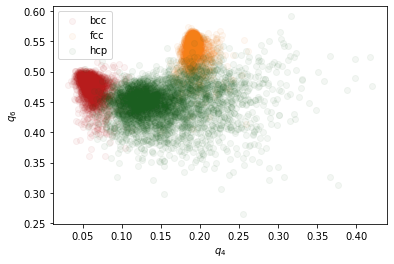

In [14]:
plt.scatter(bccq[0], bccq[1], alpha=0.05, label="bcc", color="#B71C1C")
plt.scatter(fccq[0], fccq[1], alpha=0.05, label="fcc", color="#F57F17")
plt.scatter(hcpq[0], hcpq[1], alpha=0.05, label="hcp", color="#1B5E20")
plt.xlabel(r"$q_4$")
plt.ylabel(r"$q_6$")
plt.legend()

It gets worse due to thermal fluctuations, but we can averaged the values over the neighbors

In [15]:
bccq, _ = get_steinhardt_parameter_job(pr.load("Fe_1350_0"), cutoff=3.3, averaged=True, clustering=False)
fccq, _ = get_steinhardt_parameter_job(pr.load("Cu_720_0"), averaged=True, clustering=False)
hcpq, _ = get_steinhardt_parameter_job(pr.load("Mg_1000_0"), averaged=True, clustering=False)

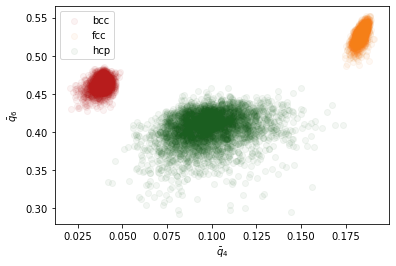

In [16]:
plt.scatter(bccq[0], bccq[1], alpha=0.05, label="bcc", color="#B71C1C")
plt.scatter(fccq[0], fccq[1], alpha=0.05, label="fcc", color="#F57F17")
plt.scatter(hcpq[0], hcpq[1], alpha=0.05, label="hcp", color="#1B5E20")
plt.xlabel(r"$\bar{q}_4$")
plt.ylabel(r"$\bar{q}_6$")
plt.legend()

We can also try adding a diamond structure to the mix

In [17]:
diaq, _ = get_steinhardt_parameter_job(pr.load("Si_1400_0"), averaged=True, clustering=False)

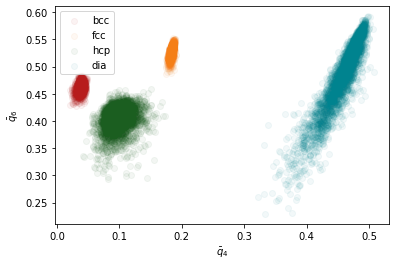

In [18]:
plt.scatter(bccq[0], bccq[1], alpha=0.05, label="bcc", color="#B71C1C")
plt.scatter(fccq[0], fccq[1], alpha=0.05, label="fcc", color="#F57F17")
plt.scatter(hcpq[0], hcpq[1], alpha=0.05, label="hcp", color="#1B5E20")
plt.scatter(diaq[0], diaq[1], alpha=0.05, label="dia", color="#00838F")
plt.xlabel(r"$\bar{q}_4$")
plt.ylabel(r"$\bar{q}_6$")
plt.legend()

Add a liquid structure

In [19]:
lqdq, _ = get_steinhardt_parameter_job(pr.load("Liquid"), averaged=True, clustering=False)

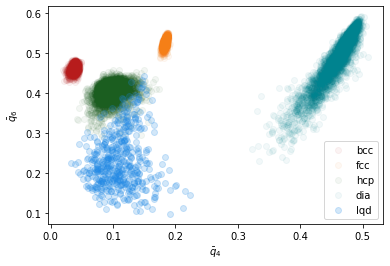

In [20]:
plt.scatter(bccq[0], bccq[1], alpha=0.05, label="bcc", color="#B71C1C")
plt.scatter(fccq[0], fccq[1], alpha=0.05, label="fcc", color="#F57F17")
plt.scatter(hcpq[0], hcpq[1], alpha=0.05, label="hcp", color="#1B5E20")
plt.scatter(diaq[0], diaq[1], alpha=0.05, label="dia", color="#00838F")
plt.scatter(lqdq[0], lqdq[1], alpha=0.20, label="lqd", color="#1E88E5")
plt.xlabel(r"$\bar{q}_4$")
plt.ylabel(r"$\bar{q}_6$")
plt.legend()

In [21]:
bccq, _ = get_steinhardt_parameter_job(pr.load("Fe_1350_0"), q=(8, 12), cutoff=3.3, averaged=True, clustering=False)
fccq, _ = get_steinhardt_parameter_job(pr.load("Cu_720_0"), q=(8, 12),averaged=True, clustering=False)
hcpq, _ = get_steinhardt_parameter_job(pr.load("Mg_1000_0"), q=(8, 12),averaged=True, clustering=False)

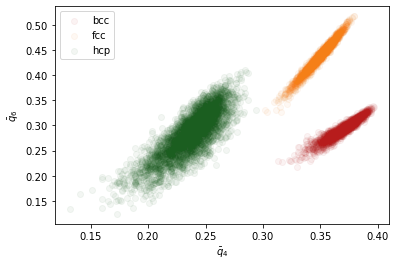

In [22]:
plt.scatter(bccq[0], bccq[1], alpha=0.05, label="bcc", color="#B71C1C")
plt.scatter(fccq[0], fccq[1], alpha=0.05, label="fcc", color="#F57F17")
plt.scatter(hcpq[0], hcpq[1], alpha=0.05, label="hcp", color="#1B5E20")
#plt.scatter(diaq[0], diaq[1], alpha=0.05, label="dia", color="#00838F")
#plt.scatter(lqdq[0], lqdq[1], alpha=0.20, label="lqd", color="#1E88E5")
plt.xlabel(r"$\bar{q}_4$")
plt.ylabel(r"$\bar{q}_6$")
plt.legend()

Get all q values

In [23]:
bccq, _ = get_steinhardt_parameter_job(pr.load("Fe_1350_5"), q=range(2, 13), cutoff=3.3, averaged=True, clustering=False)
fccq, _ = get_steinhardt_parameter_job(pr.load("Cu_720_0"), q=range(2, 13),averaged=True, clustering=False)
hcpq, _ = get_steinhardt_parameter_job(pr.load("Mg_1000_0"), q=range(2, 13),averaged=True, clustering=False)

Import clustering

In [24]:
import sklearn.cluster
import numpy as np

In [25]:
c1 = sklearn.cluster.k_means(np.hstack([bccq[:2], fccq[:2], hcpq[:2]]).T, 3)

In [26]:
wrong_bcc = np.sum(c1[1][:2000] != np.median(c1[1][:2000])) 
wrong_fcc = np.sum(c1[1][2000:4000] != np.median(c1[1][2000:4000])) 
wrong_hcp = np.sum(c1[1][4000:8000] != np.median(c1[1][4000:8000])) 

In [27]:
acc = 1 - (wrong_bcc +wrong_fcc + wrong_hcp)/8000 
acc

0.73925

Get accuracy measure

In [28]:
for i in range(2, 13):
    c1 = sklearn.cluster.k_means(np.hstack([bccq[:i], fccq[:i], hcpq[:i]]).T, 3)
    wrong_bcc = np.sum(c1[1][:2000] != np.median(c1[1][:2000])) 
    wrong_fcc = np.sum(c1[1][2000:4000] != np.median(c1[1][2000:4000])) 
    wrong_hcp = np.sum(c1[1][4000:8000] != np.median(c1[1][4000:8000]))
    acc = 1 - (wrong_bcc +wrong_fcc + wrong_hcp)/8000 
    print(acc, c1[2]/i)

0.73975 0.2585592276191804
0.987625 0.6129001784949375
0.993125 0.8039044257798553
0.998625 1.089862946377139
0.998375 1.1567243159208072
0.99875 1.2987743228155133
0.99875 1.2215957539637534
0.99875 1.2861025616220654
0.99875 1.3203286907380984
0.998625 2.1627207520443092
0.998625 1.9824940227072834


Check combination of 4 and 6

In [29]:
c1 = sklearn.cluster.k_means(np.hstack([np.array(bccq)[[2,4]], np.array(fccq)[[2,4]], np.array(hcpq)[[2,4]]]).T, 3)
wrong_bcc = np.sum(c1[1][:2000] != np.median(c1[1][:2000])) 
wrong_fcc = np.sum(c1[1][2000:4000] != np.median(c1[1][2000:4000])) 
wrong_hcp = np.sum(c1[1][4000:8000] != np.median(c1[1][4000:8000]))
acc = 1 - (wrong_bcc +wrong_fcc + wrong_hcp)/8000 
print(acc, c1[2]/2)

0.99875 1.6522672168101433


Check combination of 8 and 12

In [30]:
c1 = sklearn.cluster.k_means(np.hstack([np.array(bccq)[[6,10]], np.array(fccq)[[6,10]], np.array(hcpq)[[6,10]]]).T, 3)
wrong_bcc = np.sum(c1[1][:2000] != np.median(c1[1][:2000])) 
wrong_fcc = np.sum(c1[1][2000:4000] != np.median(c1[1][2000:4000])) 
wrong_hcp = np.sum(c1[1][4000:8000] != np.median(c1[1][4000:8000]))
acc = 1 - (wrong_bcc +wrong_fcc + wrong_hcp)/8000 
print(acc, c1[2]/2)

0.992875 6.262579674544909


Check combination of even qs

In [31]:
c1 = sklearn.cluster.k_means(np.hstack([np.array(bccq)[[2, 4, 6,10]], np.array(fccq)[[2, 4, 6,10]], np.array(hcpq)[[2, 4, 6,10]]]).T, 3)
wrong_bcc = np.sum(c1[1][:2000] != np.median(c1[1][:2000])) 
wrong_fcc = np.sum(c1[1][2000:4000] != np.median(c1[1][2000:4000])) 
wrong_hcp = np.sum(c1[1][4000:8000] != np.median(c1[1][4000:8000]))
acc = 1 - (wrong_bcc +wrong_fcc + wrong_hcp)/8000 
print(acc, c1[2]/5)

0.99875 3.208414883331198
